## Part 1 : Unsupervised Learning

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=4e944572d9ad78d36e04332193473523e6efaf5ed69d37ebfb0b34104a3527ac
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Deep Learning/Mega_Case_Study/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

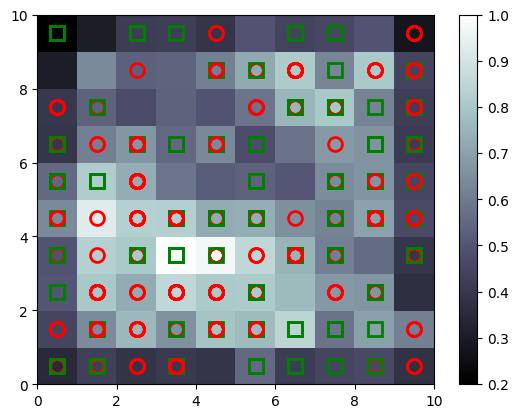

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [11]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15813718
15815271
15773934
15694237
15805627
15692718
15789865
15618703
15757933
15677395
15810716
15789201
15800049
15801817
15781574
15707681


## Part 2 : Supervised Learning

In [13]:
customers = dataset.iloc[:, 1:].values

In [14]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

### 2-1 : ANN

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [16]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [17]:
ann = tf.keras.models.Sequential()

In [18]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [19]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [20]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7950 - loss: 0.5651
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9625 - loss: 0.3404
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9751 - loss: 0.2488
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9744 - loss: 0.1910
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9735 - loss: 0.1844
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9859 - loss: 0.1078
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9739 - loss: 0.1294
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9833 - loss: 0.0903
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9783 - loss: 0.0975
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0976


In [22]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [23]:
print(y_pred)

[[1.56992380e+07 1.72176733e-04]
 [1.56245950e+07 4.81989118e-04]
 [1.57005110e+07 5.34843653e-04]
 ...
 [1.57898650e+07 1.78802520e-01]
 [1.57739340e+07 1.90949053e-01]
 [1.58137180e+07 1.96529895e-01]]
